# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `Fatemeh Hamdi`

Student ID: `401105848`

## Part 1: Linear Regression from Scratch (10 points)

In this section, we will implement **Linear Regression** using two different approaches:

1. **Gradient Descent (GD):** An iterative optimization algorithm to minimize the cost function.
2. **Normal Equation:** A direct solution using matrix operations.

We will then generate a synthetic dataset and test our implementation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None  # Model parameters (weights and bias)
        self.cost_history = []  # To track cost over iterations

    def compute_cost(self, X, y):
        """
        Compute the cost function for linear regression (Mean Squared Error).

        Parameters:
        X : numpy array of shape (m, n) - input features
        y : numpy array of shape (m,) - target values

        Returns:
        float - computed MSE cost
        """
        m = len(y)  # Number of samples
        predictions = X.dot(self.theta)  # Model predictions hθ(x) = θᵀx
        error = predictions - y
        cost = (1/(2*m)) * np.sum(error**2)  # MSE
        return cost

    def fit(self, X, y):
        """
        Train the model using gradient descent.

        Parameters:
        X : numpy array of shape (m, n) - input features
        y : numpy array of shape (m,) - target values

        Returns:
        list - cost history over training iterations
        """
        # Add bias term (intercept) to X
        X = np.c_[np.ones((X.shape[0], 1)), X]

        m, n = X.shape  # Number of samples and features (including bias)

        # Initialize parameters with zeros (θ₀, θ₁, ..., θₙ)
        self.theta = np.zeros(n)

        self.cost_history = []

        for _ in range(self.epochs):
            # Compute predictions
            predictions = X.dot(self.theta)

            # Compute gradients (∂J/∂θ)
            errors = predictions - y
            gradients = (1/m) * X.T.dot(errors)

            # Update parameters
            self.theta -= self.learning_rate * gradients

            # Store cost
            self.cost_history.append(self.compute_cost(X, y))

        return self.cost_history

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X : numpy array of shape (m, n) - input features

        Returns:
        numpy array - predicted values
        """
        # Add bias term (intercept) to X
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.theta)

In [3]:
class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None  # Model parameters (weights and bias)

    def fit(self, X, y):
        """
        Compute the optimal parameters using the Normal Equation.

        Parameters:
        X : numpy array of shape (m, n) - input features
        y : numpy array of shape (m,) - target values
        """
        # Add bias term (intercept) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Normal equation: θ = (XᵀX)⁻¹Xᵀy
        # Using np.linalg.pinv for pseudo-inverse (more numerically stable)
        self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X : numpy array of shape (m, n) - input features

        Returns:
        numpy array - predicted values
        """
        # Add bias term (intercept) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

## Part 2: Evaluating Linear Regression on a Synthetic Dataset (5 points)

Now, we will generate a synthetic dataset using a simple linear function:

$$
y = 3x + 5 + \text{normal noise}
$$


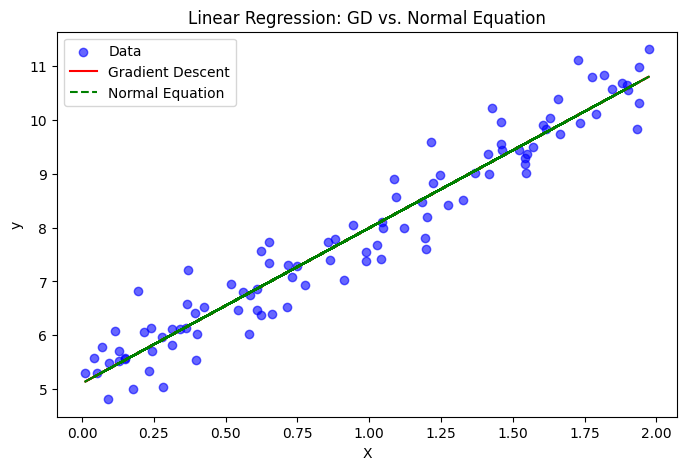

Gradient Descent parameters: [5.10754803 2.88505674]
Normal Equation parameters: [5.10754808 2.88505669]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.cost_history = []

    def compute_cost(self, X, y):
        m = len(y)
        predictions = X.dot(self.theta)
        error = predictions - y.reshape(-1, 1)  # Ensure y is column vector
        return (1/(2*m)) * np.sum(error**2)

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))  # Make theta column vector
        y = y.reshape(-1, 1)  # Ensure y is column vector
        self.cost_history = []

        for _ in range(self.epochs):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradients = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradients
            self.cost_history.append(self.compute_cost(X, y))

        return self.cost_history

    def predict(self, X):
        return X.dot(self.theta)

class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        y = y.reshape(-1, 1)  # Ensure y is column vector
        self.theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.theta)

# Generate and plot synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 5 + np.random.randn(100, 1) * 0.5

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Train models
lr_gd = LinearRegressionGD(learning_rate=0.1, epochs=1000)
cost_history = lr_gd.fit(X_b, y)
y_pred_gd = lr_gd.predict(X_b)

lr_ne = LinearRegressionNormalEq()
lr_ne.fit(X_b, y)
y_pred_ne = lr_ne.predict(X_b)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X, y_pred_gd, label="Gradient Descent", color="red")
plt.plot(X, y_pred_ne, label="Normal Equation", color="green", linestyle="dashed")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: GD vs. Normal Equation")
plt.show()

# Print parameters
print("Gradient Descent parameters:", lr_gd.theta.flatten())
print("Normal Equation parameters:", lr_ne.theta.flatten())

## Part 3: Non-Linear (Polynomial) Regression from Scratch (15 points)

Polynomial regression extends linear regression by introducing polynomial features:

$$
y = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_n x^n + \epsilon
$$

### Steps:
1. **Feature Expansion:** Convert input \( X \) to polynomial features.
2. **Train the Model:** Fit the model using both Gradient Descent and the Normal Equation.
3. **Evaluate Model Performance:** Compute **Root Mean Squared Error (RMSE)**.
4. **Visualize Results:** Compare different polynomial degrees and their impact on overfitting.


You may need to use `StandardScaler` to fix the problem of overflow !

GD RMSE: 0.8816
NE RMSE: 0.8816


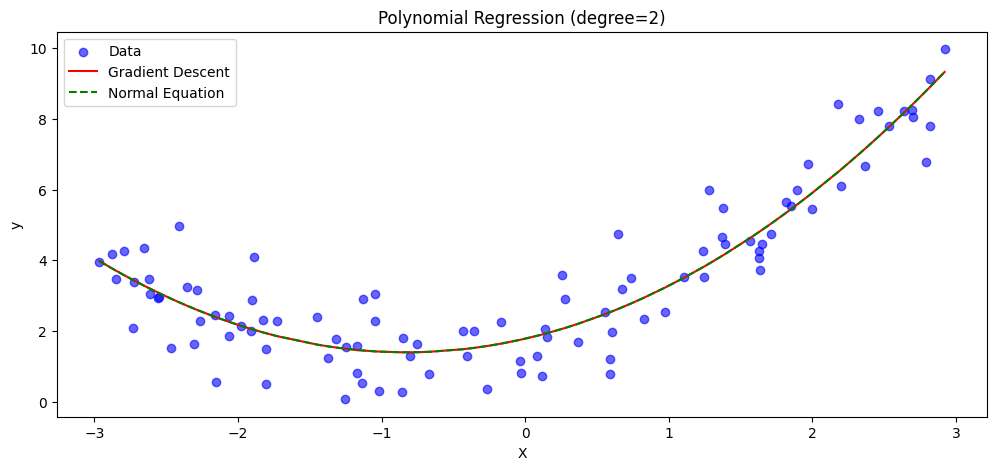

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree
        self.scaler = StandardScaler()

    def transform(self, X):
        """Create polynomial features up to the specified degree"""
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        # Create polynomial features [1, x, x², ..., x^degree]
        X_poly = np.ones((X.shape[0], 1))  # Start with bias term
        for d in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X**d))

        # Scale features to prevent overflow
        if self.degree > 1:
            X_poly[:, 1:] = self.scaler.fit_transform(X_poly[:, 1:])

        return X_poly

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        """Fit the model using gradient descent"""
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        y = y.reshape(-1, 1)
        self.cost_history = []

        for _ in range(self.epochs):
            # Compute predictions and errors
            predictions = X.dot(self.theta)
            errors = predictions - y

            # Compute gradients and update parameters
            gradients = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradients

            # Compute and store cost (MSE)
            cost = (1/(2*m)) * np.sum(errors**2)
            self.cost_history.append(cost)

        return self.cost_history

    def predict(self, X):
        """Predict target values using learned parameters"""
        return X.dot(self.theta)

class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        """Fit the model using the normal equation"""
        y = y.reshape(-1, 1)
        self.theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        """Predict target values using learned parameters"""
        return X.dot(self.theta)

def rmse(y_true, y_pred):
    """Compute Root Mean Squared Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Example usage:
if __name__ == "__main__":
    # Generate non-linear data
    np.random.seed(42)
    X = 6 * np.random.rand(100, 1) - 3
    y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

    # Create polynomial features (degree=2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.transform(X)

    # Train models
    lr_gd = LinearRegressionGD(learning_rate=0.1, epochs=1000)
    cost_history = lr_gd.fit(X_poly, y)
    y_pred_gd = lr_gd.predict(X_poly)

    lr_ne = LinearRegressionNormalEq()
    lr_ne.fit(X_poly, y)
    y_pred_ne = lr_ne.predict(X_poly)

    # Evaluate
    print(f"GD RMSE: {rmse(y, y_pred_gd):.4f}")
    print(f"NE RMSE: {rmse(y, y_pred_ne):.4f}")

    # Plot results
    plt.figure(figsize=(12, 5))

    # Sort values for smooth plotting
    sort_idx = np.argsort(X.flatten())
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    y_pred_gd_sorted = y_pred_gd[sort_idx]
    y_pred_ne_sorted = y_pred_ne[sort_idx]

    plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
    plt.plot(X_sorted, y_pred_gd_sorted, label="Gradient Descent", color="red")
    plt.plot(X_sorted, y_pred_ne_sorted, label="Normal Equation", color="green", linestyle="dashed")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Polynomial Regression (degree=2)")
    plt.show()

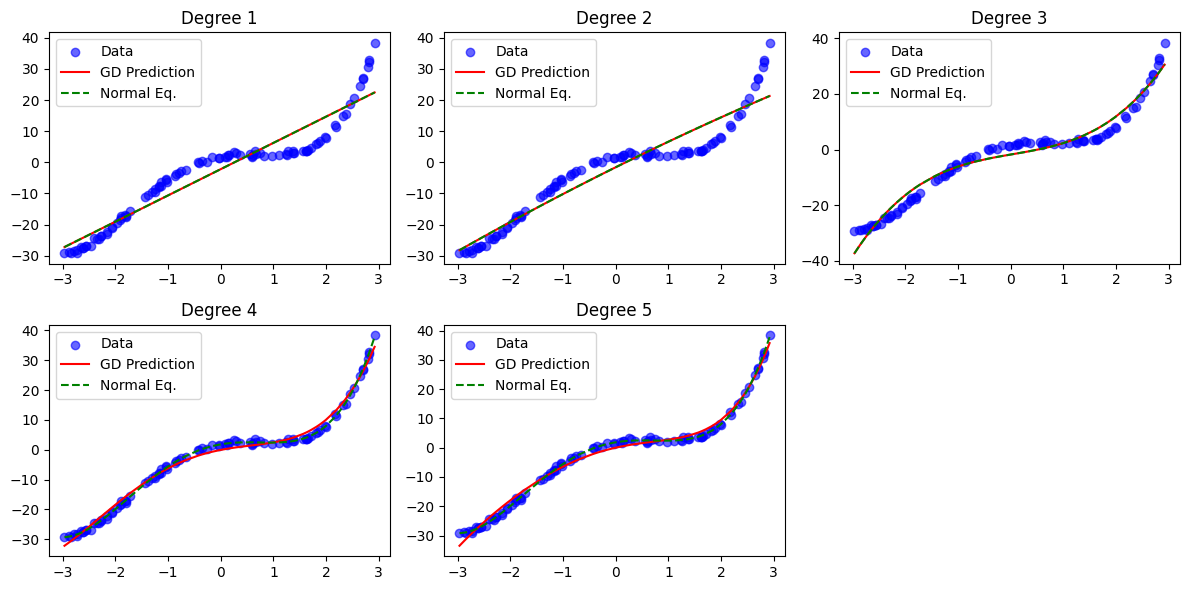

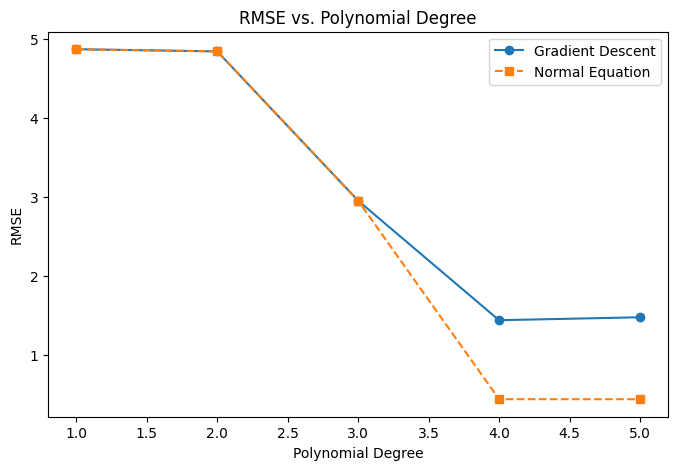

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

np.random.seed(42)

N_samples = 100
X_poly = 6 * np.random.rand(N_samples, 1) - 3
y_poly = 2 + 3 * X_poly - 4 * X_poly**2 + X_poly**3 + 0.5 * X_poly**4 + np.random.randn(N_samples, 1) * 0.5

degrees = [1, 2, 3, 4, 5]
rmse_values_gd, rmse_values_ne = [], []

plt.figure(figsize=(12, 6))

for i, degree in enumerate(degrees):
    # Transform features
    poly_features = np.ones((N_samples, 1))
    for d in range(1, degree+1):
        poly_features = np.hstack((poly_features, X_poly**d))

    # Standardize features (except bias term)
    if degree > 1:
        scaler = StandardScaler()
        poly_features[:, 1:] = scaler.fit_transform(poly_features[:, 1:])

    # Adjust learning parameters based on degree
    learning_rate = 0.1 if degree < 4 else 0.01
    epochs = 1000 if degree < 4 else 2000

    # Train with Gradient Descent
    lr_gd = LinearRegressionGD(learning_rate=learning_rate, epochs=epochs)
    lr_gd.fit(poly_features, y_poly)
    y_pred_gd = lr_gd.predict(poly_features)
    rmse_gd = rmse(y_poly, y_pred_gd)
    rmse_values_gd.append(rmse_gd)

    # Train with Normal Equation
    lr_ne = LinearRegressionNormalEq()
    lr_ne.fit(poly_features, y_poly)
    y_pred_ne = lr_ne.predict(poly_features)
    rmse_ne = rmse(y_poly, y_pred_ne)
    rmse_values_ne.append(rmse_ne)

    # Sort for plotting
    sort_idx = np.argsort(X_poly.flatten())
    X_sorted = X_poly[sort_idx]
    y_sorted = y_poly[sort_idx]
    y_pred_gd_sorted = y_pred_gd[sort_idx]
    y_pred_ne_sorted = y_pred_ne[sort_idx]

    # Plot results
    plt.subplot(2, 3, i+1)
    plt.scatter(X_poly, y_poly, label="Data", color="blue", alpha=0.6)
    plt.plot(X_sorted, y_pred_gd_sorted, label="GD Prediction", color="red")
    plt.plot(X_sorted, y_pred_ne_sorted, label="Normal Eq.", color="green", linestyle="dashed")
    plt.title(f"Degree {degree}")
    plt.legend()

plt.tight_layout()
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(8, 5))
plt.plot(degrees, rmse_values_gd, marker='o', label="Gradient Descent")
plt.plot(degrees, rmse_values_ne, marker='s', label="Normal Equation", linestyle="dashed")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs. Polynomial Degree")
plt.legend()
plt.show()

## Part 4.1: Train-Test Split and Validation (5 points)

When training a machine learning model, we need to assess its performance on unseen data. Using the same dataset for both training and evaluation can lead to **overfitting**—the model memorizes the data instead of learning patterns.

- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate how well the model generalizes.
- **Validation Set** (optional): Used to tune hyperparameters before final testing.

Typically, we split the data as follows:
- **80% Training, 20% Testing** (Common for small datasets)
- **70% Training, 15% Validation, 15% Testing** (For tuning hyperparameters)

## Part 4.2: Cross-Validation (5 points)

If we randomly split data into train-test once, the model’s performance may **depend on the specific split**. This could lead to:
1. **High variance in evaluation** (If data distribution isn't uniform)
2. **Biased results** (If important samples are missing in training)

Instead of a single train-test split, **k-Fold Cross-Validation** divides data into `k` equal parts:
- The model trains on `(k-1)` parts and tests on the remaining part.
- This repeats `k` times, each time using a different split.
- The final score is the **average of all k evaluations**.

We will implement **k-Fold Cross-Validation** from scratch and compare it with `cross_val_score` from sklearn.


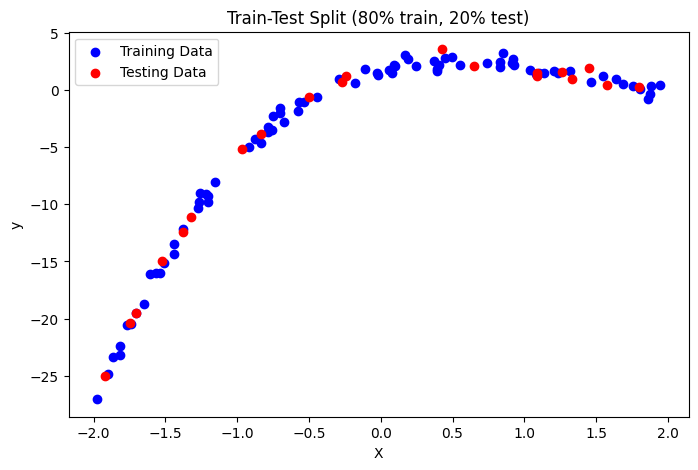

Custom CV RMSE: 0.4496
Sklearn CV RMSE: 0.4632


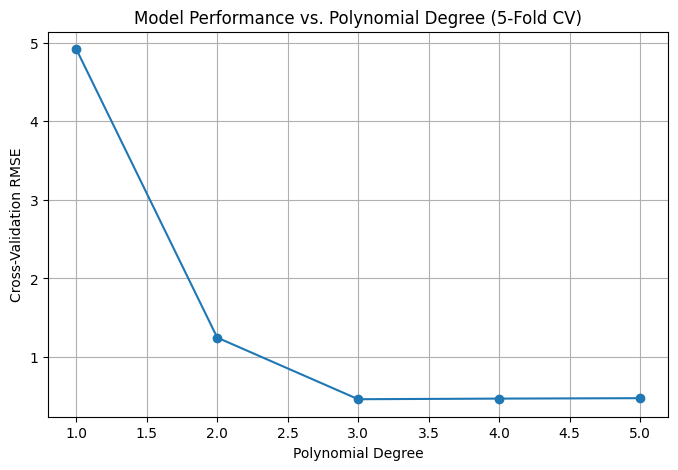

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate the dataset
np.random.seed(42)
X = 4 * np.random.rand(100, 1) - 2
y = 2 + 3 * X - 4 * X**2 + X**3 + np.random.randn(100, 1) * 0.5

# Part 4.1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train-Test Split (80% train, 20% test)")
plt.legend()
plt.show()

# Part 4.2: Cross-Validation Implementation
def k_fold_cross_val(X, y, model, k=5, degree=1):
    """Custom k-fold cross validation implementation"""
    n_samples = len(X)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    rmse_scores = []

    for i in range(k):
        # Split into train and validation sets
        val_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Train and evaluate
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_val_poly)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Compare custom implementation with sklearn's cross_val_score
degree = 3
model = LinearRegression()

# Custom implementation
custom_cv_score = k_fold_cross_val(X, y, model, k=5, degree=degree)

# Sklearn implementation
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
sklearn_cv_scores = cross_val_score(model, X_poly, y, cv=5,
                                  scoring='neg_mean_squared_error')
sklearn_cv_score = np.mean(np.sqrt(-sklearn_cv_scores))

print(f"Custom CV RMSE: {custom_cv_score:.4f}")
print(f"Sklearn CV RMSE: {sklearn_cv_score:.4f}")

# Visualize cross-validation performance for different degrees
degrees = range(1, 6)
cv_scores = []

for d in degrees:
    scores = cross_val_score(model, PolynomialFeatures(d).fit_transform(X), y,
                           cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(np.sqrt(-scores)))

plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_scores, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Cross-Validation RMSE")
plt.title("Model Performance vs. Polynomial Degree (5-Fold CV)")
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def k_fold_cv(X, y, k=5):
    # Initialize KFold with k splits, shuffling, and fixed random state
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []

    for train_index, val_index in kf.split(X):
        # Split X and y into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Compute RMSE for the current fold and store it
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Generate sample data
np.random.seed(42)
X = 4 * np.random.rand(100, 1) - 2
y = 2 + 3 * X - 4 * X**2 + X**3 + np.random.randn(100, 1) * 0.5

# Perform k-fold cross-validation and print the average RMSE
avg_rmse = k_fold_cv(X, y, k=5)
print(f"Average RMSE across 5-Fold CV: {avg_rmse:.4f}")

Average RMSE across 5-Fold CV: 4.9549


## Part 5: Overfitting in Polynomial Regression (10 points)

A model is **overfitting** when it performs **very well on training data** but **poorly on test data**.  
This happens when the model is **too complex**, learning **noise** instead of patterns.

- We will fit polynomial regression with varying degrees (1 to 10).
- We'll compare **training RMSE vs. test RMSE**.
- A significant gap between training and test RMSE indicates **overfitting**.


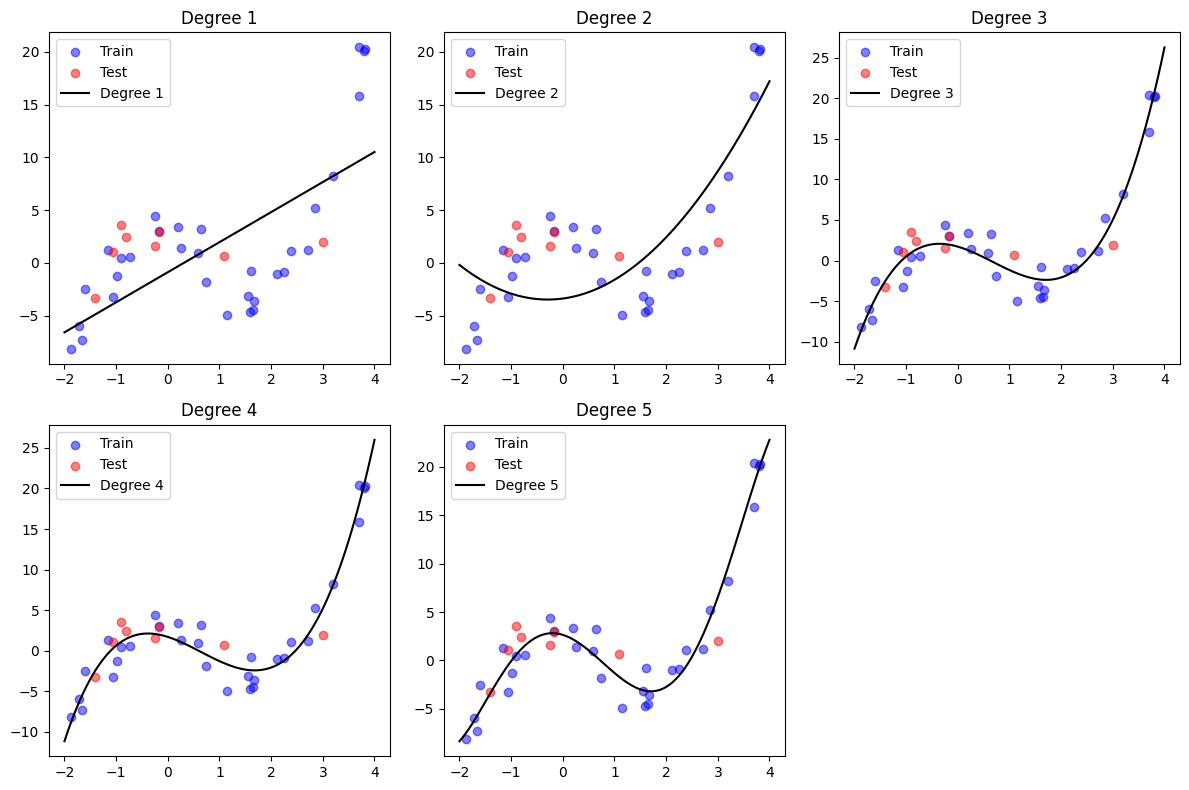

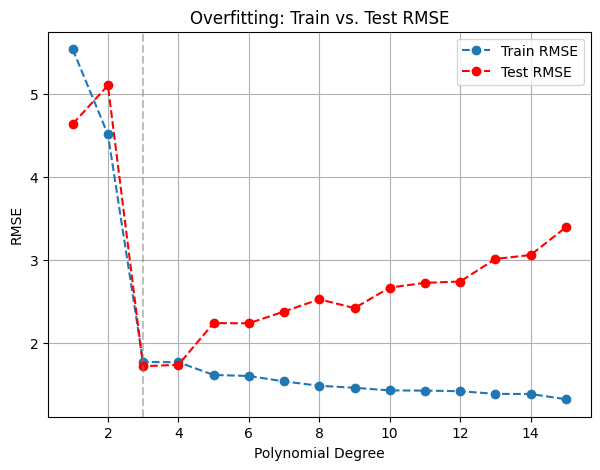

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(42)
X = 6 * np.random.rand(40, 1) - 2
y = 2 - 2 * X - 2 * X**2 + X**3 + np.random.randn(40, 1) * 2

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of polynomial degrees to test
degrees = [i for i in range(1, 16)]
train_rmse, test_rmse = [], []

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Compute RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Plot individual fits (first 5 degrees)
    if i < 5:
        plt.subplot(2, 3, i+1)
        plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train')
        plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test')

        # Create smooth curve for plotting
        X_plot = np.linspace(-2, 4, 100).reshape(-1, 1)
        X_plot_poly = poly.transform(X_plot)
        y_plot = model.predict(X_plot_poly)

        plt.plot(X_plot, y_plot, color='black', label=f'Degree {degree}')
        plt.legend()
        plt.title(f"Degree {degree}")

plt.tight_layout()
plt.show()

# Plot RMSE vs degree
plt.figure(figsize=(7, 5))
plt.plot(degrees, train_rmse, label="Train RMSE", marker="o", linestyle="dashed")
plt.plot(degrees, test_rmse, label="Test RMSE", marker="o", linestyle="dashed", color="red")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Overfitting: Train vs. Test RMSE")
plt.axvline(x=3, color='gray', linestyle='--', alpha=0.5)  # Mark true polynomial degree
plt.legend()
plt.grid(True)
plt.show()

## Part 7: Ridge & Lasso Regression: Solving Overfitting (10 points)

Regularization **adds a penalty** to the model to **reduce overfitting**.

### Ridge Regression (L2 Regularization)
- Adds **L2 penalty**: `λ * ||θ||²`
- Keeps all features but shrinks coefficients.

### Lasso Regression (L1 Regularization)
- Adds **L1 penalty**: `λ * ||θ||`
- Can set some coefficients **exactly to zero**, performing feature selection.

1. Apply **Ridge & Lasso Regression** on our dataset.
2. Compare them to standard **Polynomial Regression**.
3. Evaluate **RMSE on test data**.


RMSE - Polynomial Regression (Degree 10): 2.6686
RMSE - Ridge Regression (L2, α=10): 3.2847
RMSE - Lasso Regression (L1, α=0.1): 2.4262


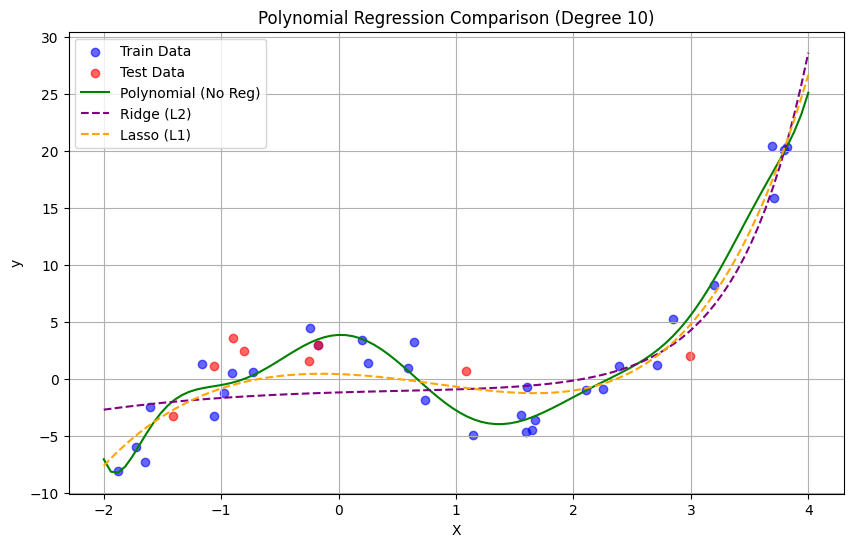


Coefficient magnitudes:
Polynomial: 12430.99
Ridge: 7.85
Lasso: 18.47

Number of zero coefficients in Lasso: 7


In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate the same dataset as before
np.random.seed(42)
X = 6 * np.random.rand(40, 1) - 2
y = 2 - 2 * X - 2 * X**2 + X**3 + np.random.randn(40, 1) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degree (using degree 10 to show overfitting)
degree = 10

# Transform features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize features (important for regularization)
scaler = StandardScaler()
X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:])
X_test_poly[:, 1:] = scaler.transform(X_test_poly[:, 1:])

# Standard Polynomial Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Ridge Regression (L2 regularization)
model_ridge = Ridge(alpha=10, random_state=42)  # alpha is λ (regularization strength)
model_ridge.fit(X_train_poly, y_train)
y_pred_ridge = model_ridge.predict(X_test_poly)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression (L1 regularization)
model_lasso = Lasso(alpha=0.1, random_state=42)  # Smaller alpha for Lasso
model_lasso.fit(X_train_poly, y_train)
y_pred_lasso = model_lasso.predict(X_test_poly)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"RMSE - Polynomial Regression (Degree {degree}): {rmse_poly:.4f}")
print(f"RMSE - Ridge Regression (L2, α=10): {rmse_ridge:.4f}")
print(f"RMSE - Lasso Regression (L1, α=0.1): {rmse_lasso:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
X_plot = np.linspace(-2, 4, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
X_plot_poly[:, 1:] = scaler.transform(X_plot_poly[:, 1:])

plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.6)
plt.plot(X_plot, model_poly.predict(X_plot_poly), color="green", label="Polynomial (No Reg)")
plt.plot(X_plot, model_ridge.predict(X_plot_poly), color="purple", linestyle="dashed", label="Ridge (L2)")
plt.plot(X_plot, model_lasso.predict(X_plot_poly), color="orange", linestyle="dashed", label="Lasso (L1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Polynomial Regression Comparison (Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients to show effect of regularization
print("\nCoefficient magnitudes:")
print(f"Polynomial: {np.sum(np.abs(model_poly.coef_)):.2f}")
print(f"Ridge: {np.sum(np.abs(model_ridge.coef_)):.2f}")
print(f"Lasso: {np.sum(np.abs(model_lasso.coef_)):.2f}")
print(f"\nNumber of zero coefficients in Lasso: {np.sum(model_lasso.coef_ == 0)}")

## Part 8: Train-Test Split vs. Cross-Validation (10 points)

- A simple way to evaluate models: **train on one set, test on another**.
- **Problem:** Performance depends on how the data was split.
- Can lead to **high variance** in evaluation.

- **More reliable evaluation** by training & testing on multiple splits.
- **k-Fold CV:** Data is split into `k` parts.
  - Model is trained `k` times, each time using a different fold as test data.
  - We take the **average score** over `k` runs.

### Why Use CV?
Cross-validation (CV) provides more reliable performance estimates by averaging results across multiple train-test splits, reducing variance and giving a better measure of how the model will generalize to unseen data compared to a single train-test split.

Key Benefits:

1. Reduces Variance – Averages performance across different data splits.

2. Better Generalization – Tests on multiple subsets, not just one.

3. Optimal Model Selection – Helps choose hyperparameters more robustly.

4. Efficient Data Use – Maximizes training data in each iteration.

Simple Rule:

- Use train-test split for quick evaluation.

- Use k-fold CV for reliable model selection and evaluation.

Best Ridge α: 0.0687, RMSE: 5.7041
Best Lasso α: 0.0010, RMSE: 5.7042


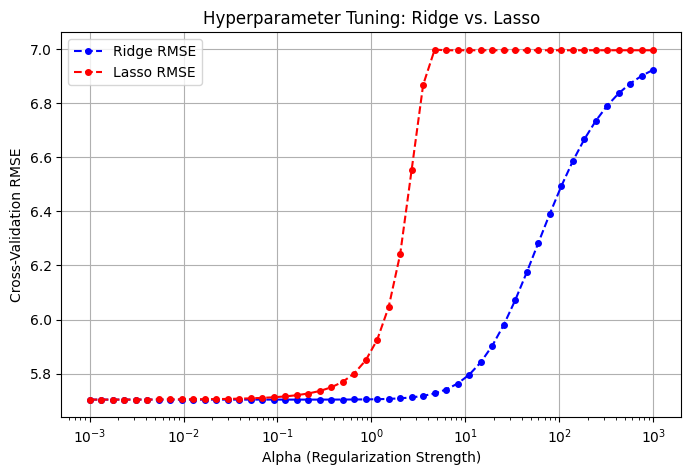

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Define a range of alpha values (logarithmic scale)
alphas = np.logspace(-3, 3, 50)  # From 0.001 to 1000

# Perform Ridge Regression with Cross-Validation
ridge_scores = []
for alpha in alphas:
    model_ridge = make_pipeline(
        StandardScaler(),
        Ridge(alpha=alpha, random_state=42)
    )
    scores = cross_val_score(model_ridge, X, y.ravel(), cv=5,
                           scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(scores))

# Perform Lasso Regression with Cross-Validation
lasso_scores = []
for alpha in alphas:
    model_lasso = make_pipeline(
        StandardScaler(),
        Lasso(alpha=alpha, random_state=42)
    )
    scores = cross_val_score(model_lasso, X, y.ravel(), cv=5,
                           scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(scores))

# Convert scores to RMSE values
ridge_rmse = np.sqrt(-np.array(ridge_scores))
lasso_rmse = np.sqrt(-np.array(lasso_scores))

# Find the best alpha values
best_ridge_idx = np.argmin(ridge_rmse)
best_lasso_idx = np.argmin(lasso_rmse)
best_ridge_alpha = alphas[best_ridge_idx]
best_lasso_alpha = alphas[best_lasso_idx]

print(f"Best Ridge α: {best_ridge_alpha:.4f}, RMSE: {ridge_rmse[best_ridge_idx]:.4f}")
print(f"Best Lasso α: {best_lasso_alpha:.4f}, RMSE: {lasso_rmse[best_lasso_idx]:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_rmse, label="Ridge RMSE", marker="o",
        linestyle="dashed", color="blue", markersize=4)
plt.plot(alphas, lasso_rmse, label="Lasso RMSE", marker="o",
        linestyle="dashed", color="red", markersize=4)
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Cross-Validation RMSE")
plt.title("Hyperparameter Tuning: Ridge vs. Lasso")
plt.legend()
plt.grid(True)
plt.show()